<a href="https://colab.research.google.com/github/RaidenXP/Homework-5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
import en_core_web_lg
import pickle
import pandas as pd
from newsapi import NewsApiClient
from collections import Counter
from string import punctuation

nlp = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='279c1df6854547bc9bc0cdb36bf74d52')

In [ ]:
articles = []
for i in range(1, 6):
  if(i == 6): break
  data = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-28', 
                                to='2021-03-25', sort_by='relevancy', page=i)
  articles.append(data)

In [ ]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
data = []

for i, article in enumerate(articles):
  for x in article['articles']:
    title = x['title']
    date = x['publishedAt']
    description = x['description']
    content = x['content']
    data.append({'title':title, 'date':date, 'desc':description, 'content':content})

In [ ]:
df = pd.DataFrame(data)
df = df.dropna()
df.head()

,title,date,desc,content
0,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...
1,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...
2,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...
3,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ..."


In [ ]:
def get_keywords_eng(text):
  result = []
  pos_tag = ['VERB', 'NOUN', 'PROPN']
  doc = nlp(text)

  for token in doc:
    if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)

  return result

In [80]:
results = []

for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results

filename = 'articlesCOVIDmodified.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVIDmodified.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVIDmodified.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

df

,title,date,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...,"[#ethicists, #list, #suggests, #risks, #condit..."
1,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...,"[#efforts, #scaled, #country, #strives, #herd]"
2,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...,"[#going, #think, #months, #look, #U.S.]"
3,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...,"[#Knight, #seen, #Wayne, #ads, #Space]"
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ...","[#Green, #Passport, #system, #working, #example]"
...,...,...,...,...,...
95,What you need to know about the coronavirus ri...,2021-03-17T11:48:00Z,What you need to know about the coronavirus ri...,By Reuters Staff\r\n(Reuters) - Heres what you...,"[#Reuters, #Staff, #Heres, #need, #know]"
96,What you need to know about the coronavirus ri...,2021-03-17T05:44:00Z,What you need to know about the coronavirus ri...,By Reuters Staff\r\n(Reuters) - Heres what you...,"[#Reuters, #coronavirus, #Staff, #Heres, #need]"
97,What you need to know about the coronavirus ri...,2021-03-18T10:45:00Z,What you need to know about the coronavirus ri...,By Reuters Staff\r\n(Reuters) - Heres what you...,"[#Reuters, #Staff, #Heres, #need, #know]"
98,What you need to know about the coronavirus ri...,2021-03-22T05:55:00Z,What you need to know about the coronavirus ri...,By Reuters Staff\r\n(Reuters) - Heres what you...,"[#Reuters, #coronavirus, #Staff, #Heres, #need]"


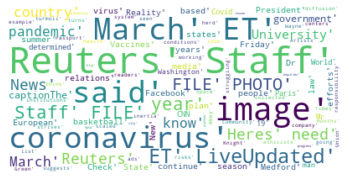

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordCloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()